In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from Codigo import *
import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
sns.set(style="whitegrid")

In [30]:
datos = Tachos('../Alemania_Reducida.csv')
Columnas(datos, 'Inflación')

Inflación, índice de deflación del PIB (% anual)
Inflación, precios al consumidor (% anual)
Inflación, deflactor del PIB: series vinculadas (% anual)


In [31]:
variable = pd.DataFrame({f'inflacion':datos['Inflación, precios al consumidor (% anual)']})

In [32]:
variable['log'] = np.log(variable['inflacion'])
variable['ldiff'] = variable['log'].diff()
variable['inflacion'] = variable['inflacion']/100
variable['diff'] = variable['inflacion'].diff()
variable.dropna(axis = 0, inplace = True)

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


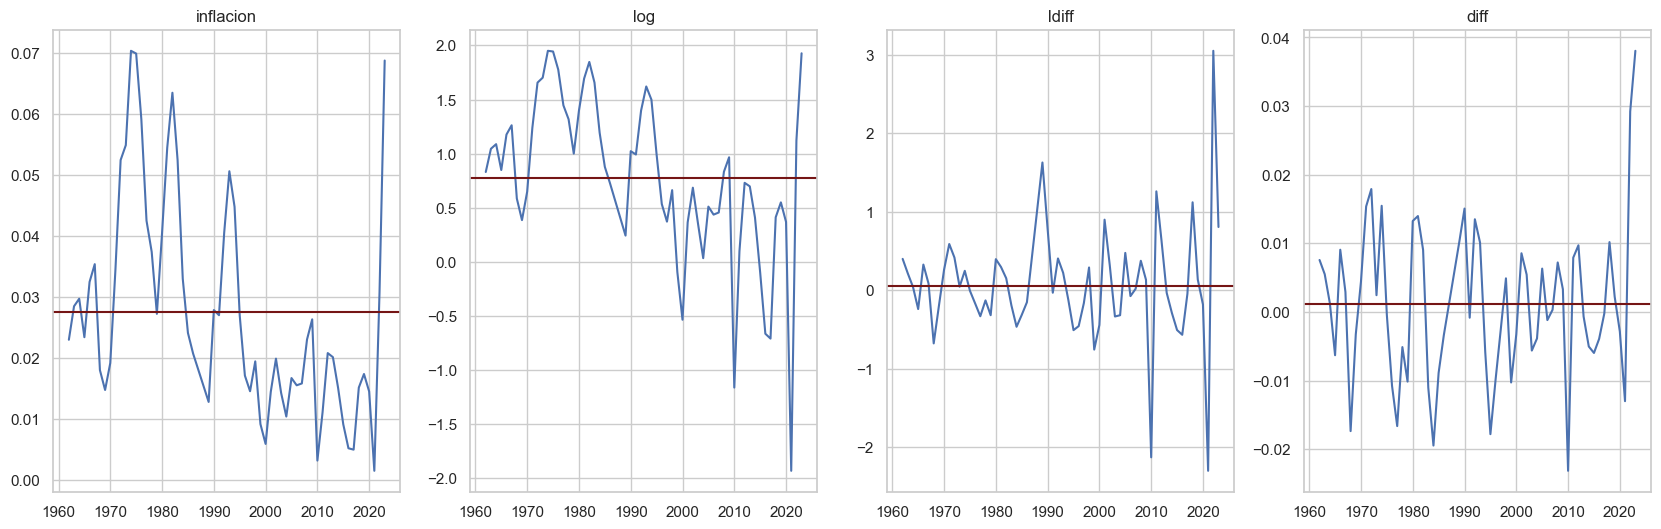

In [33]:
plt.figure(figsize=(26,6))

for i in range(len(variable.columns)):
    a = variable.columns[i]
    plt.subplot(1,len(variable.columns)+1, i+1)
    plt.plot(variable[a])
    plt.title(a)
    plt.axhline(y = variable[a].mean(), c = '#751515')

plt.show()

In [34]:
for i in variable.columns:
    print('==============================================')
    print(i)
    print('===============================================')
    DFuller(variable[i])

inflacion
Estadístico ADF: -3.1247151604033534
Valor p: 0.02477740429950823
Rechazamos la hipótesis nula; la serie es estacionaria.
log
Estadístico ADF: -1.643223504722491
Valor p: 0.4605769188187698
No podemos rechazar la hipótesis nula; la serie no es estacionaria.
ldiff
Estadístico ADF: -2.981590652220671
Valor p: 0.036649734904353116
Rechazamos la hipótesis nula; la serie es estacionaria.
diff
Estadístico ADF: -5.367988229524993
Valor p: 3.95303208525612e-06
Rechazamos la hipótesis nula; la serie es estacionaria.


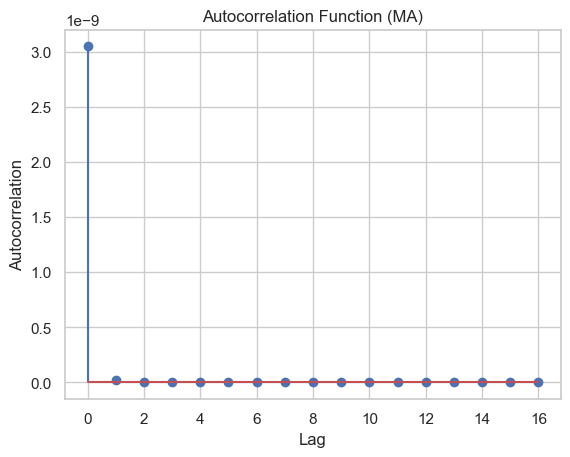

In [35]:
acf_ma(variable['inflacion'],2)

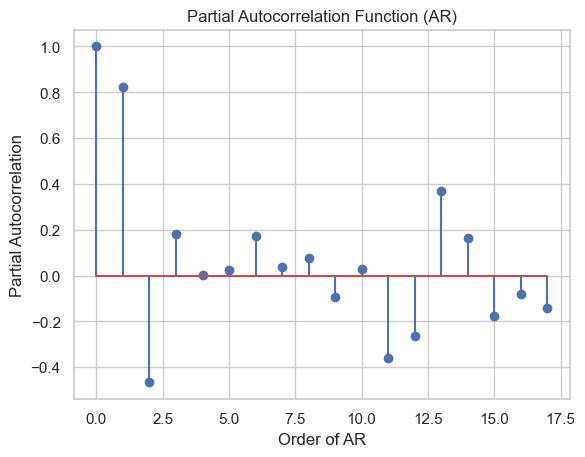

In [36]:
pacf_ar(variable['inflacion'])

In [37]:
Pruebatoolkit(variable['inflacion'],6)

Mejor orden encontrado: (1, 0, 1) con AIC: -374.3616186500578


(1, 0, 1)

In [42]:
model = ARIMA(variable['inflacion'], order = (1,0,1)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              inflacion   No. Observations:                   60
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 191.181
Date:                Sat, 09 Dec 2023   AIC                           -374.362
Time:                        02:57:23   BIC                           -365.984
Sample:                             0   HQIC                          -371.085
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0292      0.006      4.534      0.000       0.017       0.042
ar.L1          0.6774      0.130      5.225      0.000       0.423       0.932
ma.L1          0.4911      0.112      4.376      0.0

C:\Users\Miguel\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


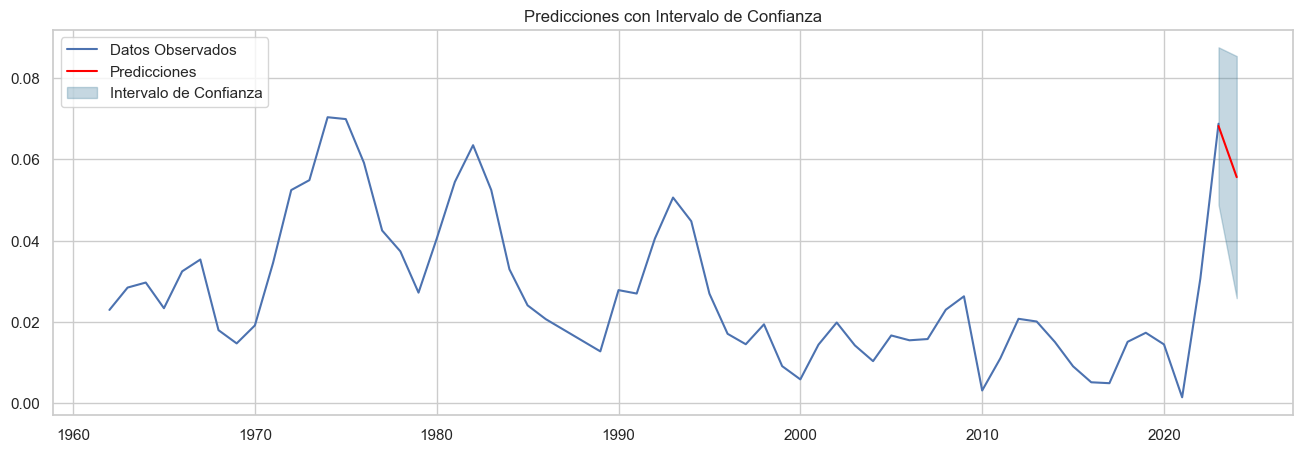

In [45]:
tiempo = 2
prediccion = model.get_forecast(tiempo)
fechas_prediccion = pd.date_range(start=variable.index[-1], periods=tiempo, freq='Y')
intervalo_confianza = prediccion.conf_int()
predicciones_df = pd.DataFrame({'Prediccion': prediccion.predicted_mean.values, 'Lower': intervalo_confianza.iloc[:, 0], 'Upper': intervalo_confianza.iloc[:, 1]}, index=fechas_prediccion)
plt.figure(figsize=(16,5))
plt.plot(variable['inflacion'], label='Datos Observados')
plt.plot(predicciones_df['Prediccion'], color='red', label='Predicciones')
plt.fill_between(predicciones_df.index,intervalo_confianza['lower inflacion'], intervalo_confianza['upper inflacion'], color='#3F7D9C', alpha=0.3, label='Intervalo de Confianza')
plt.title('Predicciones con Intervalo de Confianza')
plt.legend(loc = 'upper left')
plt.show()